# TF First Neural Network
- Explorando EPOCHS Usando CallBacks

Esse notebook trabalha de forma introdutória o efeito das épocas (epochs) no treinamnto de uma rede neural através da criação de uma NN de uma camada e um neurônio com Keras.

## Import Libraries

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

# verificar versão do TF
print(tf.version.VERSION)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


## Dataset

In [3]:
# Definindo dados de treinamento (x - entrada, y - saída)

# esses pontos formam uma reta
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Fluxo da Criação do modelo

1. Define-se a arquitetura da rede nerual (quantidade de neurônios e camadas)
2. Compila-se o modelo escolhendo um método de otimização e uma função de perda (loss function).

## Define Model (NN Arquitecture)
TF functions: https://www.tensorflow.org/api_docs

In [4]:
# Define uma rede neural com um neurônio

# um neurônio e uma entrada
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

## Compile Model

In [5]:
# otimização : stochastic gradient descent (sgd)
# loss function : mean squared error

model.compile(optimizer='sgd', loss='mean_squared_error')

In [6]:
# Mostra um resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observando pesos (parâmetros) iniciais:

In [7]:
model.get_weights() # lista dos parâmetros

[array([[-0.6276685]], dtype=float32), array([0.], dtype=float32)]

In [8]:
print("wi = ", model.get_weights()[0])  # peso / weight
print("b  = ", model.get_weights()[1])  # viés / bias

wi =  [[-0.6276685]]
b  =  [0.]


## Training

Callbacks:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

Um callback é uma ferramenta poderosa para **personalizar o comportamento de um modelo Keras durante treinamento, avaliação ou inferência**. Os exemplos incluem tf.keras.callbacks.TensorBoard para visualizar o progresso e os resultados do treinamento com o TensorBoard ou tf.keras.callbacks.ModelCheckpoint para salvar periodicamente seu modelo durante o treinamento.
https://www.tensorflow.org/guide/keras/custom_callback

Todos os callbacks são subclasses da classe keras.callbacks.Callback e override um conjunto de métodos chamados em vários estágios de treinamento, teste e previsão. Os retornos de chamada são úteis para obter uma **visão dos estados internos e estatísticas do modelo durante o treinamento.**

In [9]:
predictions = []
# Subclass keras.callbacks.Callback (custom callback)
class myCallback(tf.keras.callbacks.Callback):
  # override method
  def on_epoch_end(self, epoch, logs={}):
    predictions.append(model.predict(xs))
callbacks = myCallback()

In [10]:
# Treinamento do modelo com os dados
history = model.fit(xs, ys, epochs=500, callbacks=[callbacks], verbose=0)

1/1 [==============================] - 0s 13ms/step


In [11]:
# This callback is automatically applied to every Keras model. The History object gets returned by the fit method of models.
type(history)

keras.src.callbacks.History

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History </br>
`dir(history)`: '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__',
 '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_implements_predict_batch_hooks', '_implements_test_batch_hooks', '_implements_train_batch_hooks',
 '_keras_api_names', '_keras_api_names_v1', '_supports_tf_logs', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin',
 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end',
 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']

**Verificar modelo**:

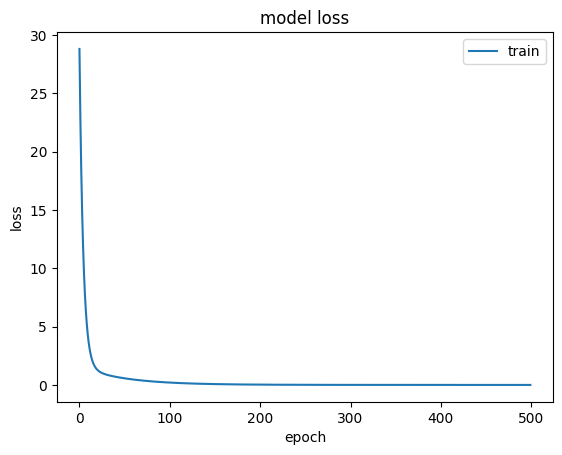

In [12]:
# Plot dos valores de loss com o passar das épocas
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [13]:
# Parâmetros (peso e bias) depois do treinamento
print("wi = ", model.get_weights()[0])
print("b  = ", model.get_weights()[1])

wi =  [[1.9969883]]
b  =  [-0.9906626]


## Test model

In [14]:
# Inferência (predict) de novos dados

print(model.predict([10.0]))

1/1 [==============================] - 0s 27ms/step
[[18.979221]]


Como os dados originais formam uma reta (2x - 1), é fácil verificar que o resultado esperado para essa entrada é de 19.

In [15]:
# Inferência dos dados de treino
y_predicted = model.predict(xs)
y_predicted.shape

1/1 [==============================] - 0s 15ms/step


(6, 1)

In [16]:
y_predicted

array([[-2.9876509],
       [-0.9906626],
       [ 1.0063257],
       [ 3.003314 ],
       [ 5.0003023],
       [ 6.9972906]], dtype=float32)

In [17]:
# Dados verdadeiros de outputs
ys

array([-3., -1.,  1.,  3.,  5.,  7.])

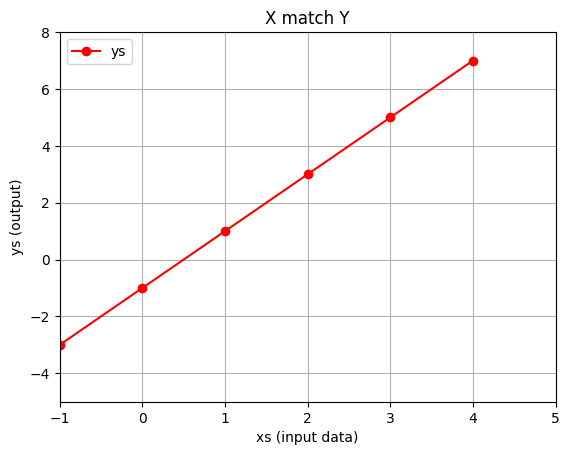

In [18]:
# Plot dos dados verdadeiros de saída
plt.plot(xs, ys, color='red', marker='o', label='ys')
plt.axis([-1,5,-5,8])
plt.title('X match Y')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()

In [19]:
# Quantidade de predictions geradas do treino (1 por época)
len(predictions)

500

In [20]:
# predicitions da época 10
predictions[10]

array([[-0.6473614],
       [ 0.3128653],
       [ 1.2730919],
       [ 2.2333186],
       [ 3.1935453],
       [ 4.153772 ]], dtype=float32)

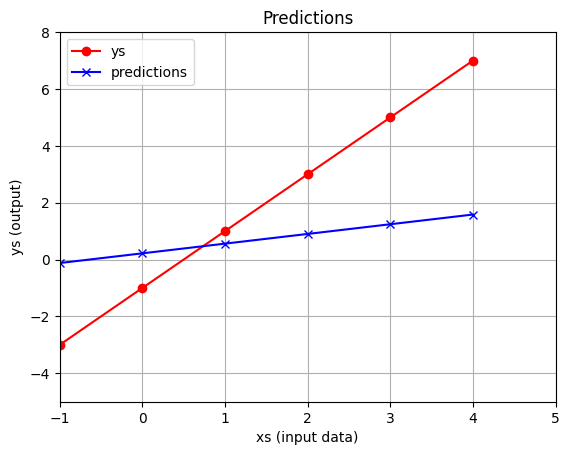

In [21]:
# Plot das predictions da época 5
EPOCH = 5
plt.plot(xs, ys, color='red', marker='o', label='ys')
plt.plot(xs, predictions[EPOCH-1], color='blue', marker='x', label='predictions')
plt.axis([-1,5,-5,8])
plt.title('Predictions')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()

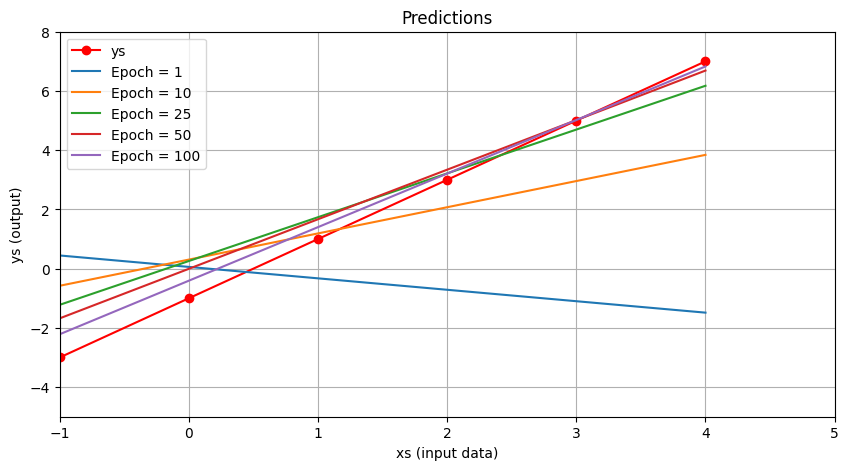

In [22]:
# Plot com predictions de várias épocas
EPOCHS = [1, 10, 25, 50, 100]
plt.figure(figsize=(10,5))
plt.plot(xs, ys, color='red', marker='o', label='ys')
for EPOCH in EPOCHS:
    plt.plot(xs, predictions[EPOCH-1], label = "Epoch = "+str(EPOCH))

plt.axis([-1,5,-5,8])
plt.title('Predictions')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()